## ***PRODIGY_DS_04***

***Import Dependencies***

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

***Load Data***

In [2]:
training = pd.read_csv('twitter_training.csv')
validation = pd.read_csv('twitter_validation.csv')

In [3]:
training.head()
validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


***Adding Header***

In [4]:
columns = ['TweetId','Entity','Sentiment','Tweet content']
training = pd.read_csv('twitter_training.csv',header=None,names=columns)
validation = pd.read_csv('twitter_validation.csv',header=None,names=columns)

In [5]:
training.head()

,TweetId,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
validation.head()

,TweetId,Entity,Sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetId        74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
training.isna().sum()

TweetId            0
Entity             0
Sentiment          0
Tweet content    686
dtype: int64

In [9]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetId        1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [10]:
validation.isna().sum()

TweetId          0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [11]:
training.duplicated().sum()

2700

In [12]:
validation.duplicated().sum()

0

In [13]:
training = training.drop_duplicates()

In [14]:
training.duplicated().sum()

0

In [15]:
training.iloc[:, 2].value_counts()

Sentiment
Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [16]:
validation.iloc[:,2].value_counts()

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [17]:
training['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [21]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(training["Sentiment"])
X_val = vectorizer.transform(validation["Sentiment"])

model = MultinomialNB(alpha=1.5)
model.fit(X_train, training['Sentiment'])

MultinomialNB(alpha=1.5)

In [23]:
predictions = model.predict(X_val)

from sklearn.metrics import f1_score

f1 = f1_score(validation['Sentiment'], predictions,average='micro')
print(f'F1 Score: {f1:.2f}')

F1 Score: 1.00


In [24]:
print('Classification Report:\n', classification_report(validation['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(validation['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       172
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[172   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


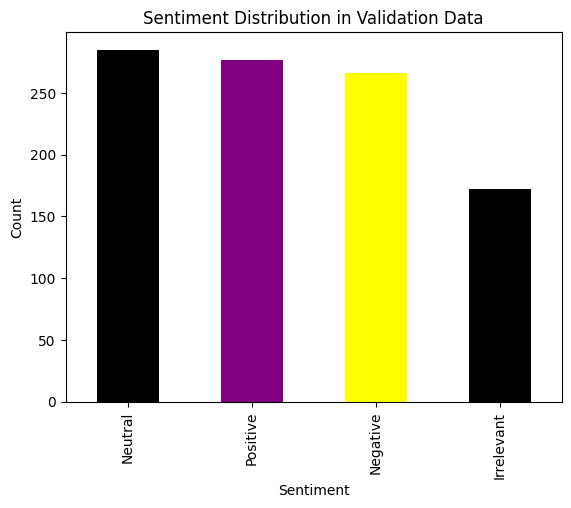

In [25]:
sentiment_distribution = validation['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['black', 'purple', 'yellow'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

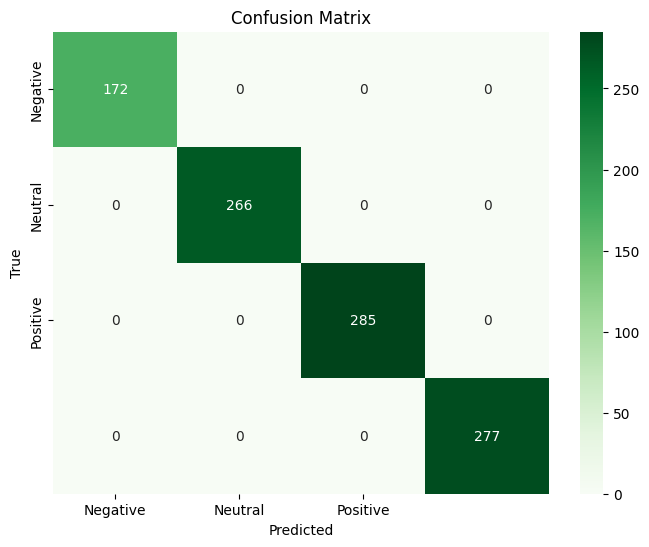

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(validation['Sentiment'], predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<ipython-input-31-b76a106c00cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette=['orange','blue','red', 'green'])


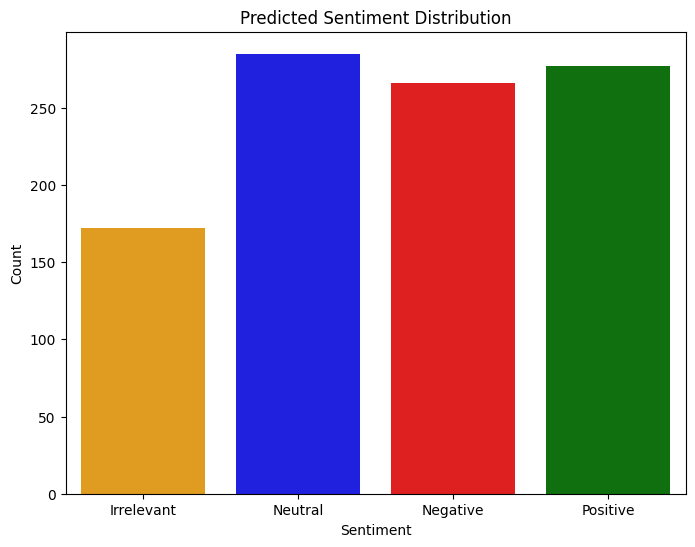

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette=['orange','blue','red', 'green'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation
        tokens = [word for word in tokens if word.isalpha()]
        # Convert to lowercase
        tokens = [word.lower() for word in tokens]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in stop_words]
        return ' '.join(tokens)
    else:
        return '' # Return empty string if text is not a string

In [36]:
import sys
print(sys.executable)

/usr/bin/python3


In [38]:
# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Apply preprocessing and sentiment analysis
training['clean_text'] = training['Tweet content'].apply(preprocess_text)
training['sentiment_score'] = training['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

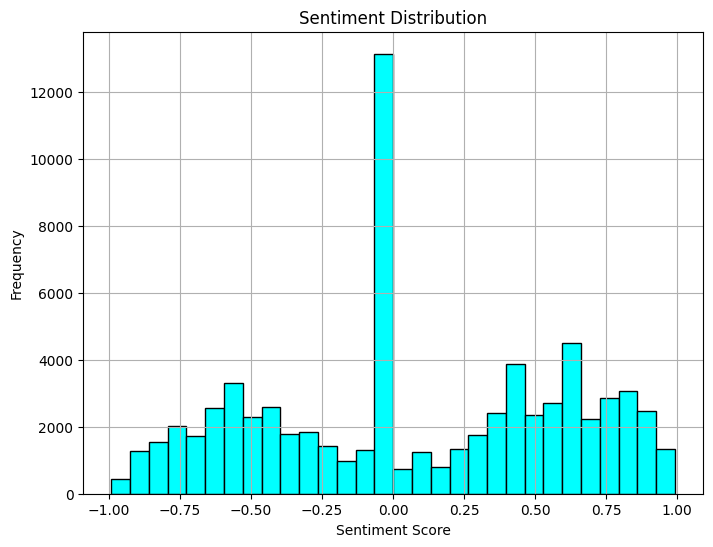

In [46]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(training['sentiment_score'], bins=30, color='cyan', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
# Convert 'text' column to string type and handle missing values
training['Tweet Content'] = training['Tweet content'].astype(str)

# Ensure 'text' column contains only string values
training['Tweet Content'] = training['Tweet content'].apply(lambda x: x if isinstance(x, str) else "")

In [49]:
# Function to get sentiment scores
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis
training['sentiment_score'] = training['Tweet Content'].apply(get_sentiment_score)

# Generate word cloud of positive and negative sentiments
positive_text = ' '.join(training[training['sentiment_score'] > 0]['Tweet Content'])
negative_text = ' '.join(training[training['sentiment_score'] < 0]['Tweet Content'])

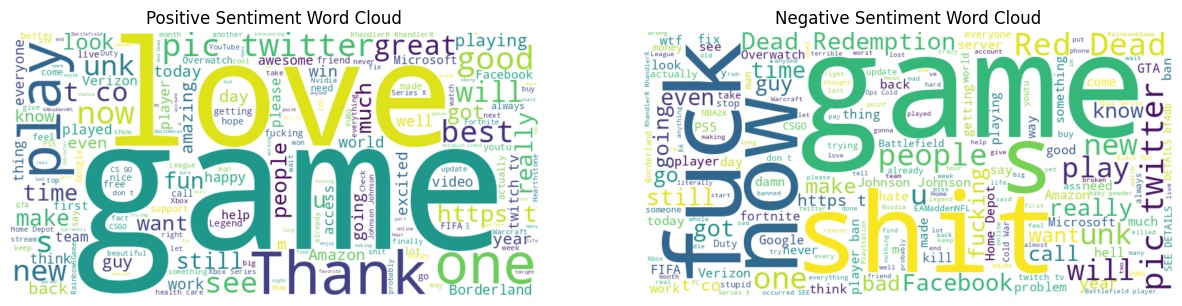

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()